<a href="https://colab.research.google.com/github/victor1cg/Spark/blob/main/Big_Data_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **HADOOP**

*Estudo do curso Big Data na Pratica - Hotmart.*

Conjunto de frameworks open sources para processamento e armazenamento de Big Data.

**ECOSISTEMA HADOOP** -> Mesmo paradigma de map e reduce, e salvar em memoria RAM.

-*HDFS* - Sistema de arquivos distribuidos do Hadoop

-*Hadoop YARN* - Gerenciador de Recursos

-*MapReduce* - Framework para big data

\ > Quebra de linha

**Cluster** - Conjunto de computadores (nós) interligados para processar uma mesma tarefa.

Master e Workers - 

O Apache Spark tem como pré requisito primário o JAVA 8, uma vez que o mesmo utiliza da JVM(Java Virtual Machine) para paralelizar o processamento dos dados.



In [1]:
# INSTALAR AS DEPENDENCIAS 
#Instalar o JAVA 8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

#Baixar a versão mais recente do Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

#Deszipar o Spark
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

#Criar as variaveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

#Instalar a lib que ajuda a localizar o Spark e instalar aqui
!pip install -q findspark
#Tornar o pyspark "importável"
import findspark
findspark.init('spark-3.1.2-bin-hadoop2.7')

In [2]:
# criar a spark Session
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master('local')\
        .appName('sparkcolab')\
        .getOrCreate()

spark



In [ ]:
!pip install ipython-autotime

%load_ext autotime

O **SparkSession** é o objeto responsável por criar Dataframes, ou seja, estrutura de dados paralelizáveis semelhante aos dataframes do framework pandas e da linguagem R . Em modos interativos, como é o caso do CLI pyspark, o objeto SparkSession já vem previamente instânciado.

### **Aula 3 - High Levels API e Data Frames**

*Podemos ver aqui dois processos principais:*

**Workers**: processo responsável por realizar a computação bruta dos dados, de forma paralela, ou
seja, cada executor em um cluster irá processar uma parte dos dados.

**Driver**: processo responsável por coordenar a aplicação e enviar instrução de processamento
(transformações) para os executores e receber os resultados das ações. Códigos não paralelizáveis
(códigos que não usufruem dos Dataframes ou RDDs), consumirão poder de processamento e
memória do processo Driver. Exemplo: Pandas

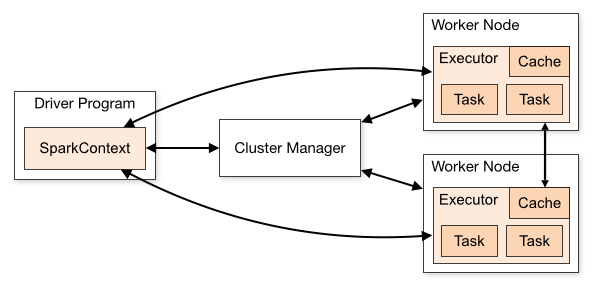

In [ ]:
# Data Frames

data_dict = [{
 "nome":"Jose",
 "idade": 52,
 "profissao": "Advocacia"
},{
 "nome":"Maria",
 "idade": 35,
 "profissao": "Medicina"
},{
 "nome":"Pedro",
 "idade": 25,
 "profissao": "Estudante"
}]

In [ ]:
df_dict = spark.createDataFrame(data_dict)
df_dict.show(vertical=True)
# df_dict.printSchema() #Meta dado


-RECORD 0--------------
 idade     | 52        
 nome      | Jose      
 profissao | Advocacia 
-RECORD 1--------------
 idade     | 35        
 nome      | Maria     
 profissao | Medicina  
-RECORD 2--------------
 idade     | 25        
 nome      | Pedro     
 profissao | Estudante 



In [3]:
#inferSchema - infere o tipo do meta dado

df = spark.read.csv('vgsales.csv',header=True,inferSchema=True)

df.show()
df.printSchema()

+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|       Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|   1|          Wii Sports|     Wii|2006|      Sports|            Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985|    Platform|            Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|      Mario Kart Wii|     Wii|2008|      Racing|            Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
|   4|   Wii Sports Resort|     Wii|2009|      Sports|            Nintendo|   15.75|   11.01|    3.28|       2.96|        33.0|
|   5|Pokemon Red/Pokem...|      GB|1996|Role-Playing|            Nintendo|   11.27|    8.89|   10.22|  

In [ ]:
#Utilizar um schema definido pelo usuario
from pyspark.sql.types import StructType,StructField,StringType,IntegerType,DoubleType

#(nome_coluna, tipo de dado, nullable) 
schema = StructType([
 StructField("new_rank", IntegerType(), True),
 StructField("new_name", StringType(), True),
 StructField("new_platform", StringType(), True),
 StructField("new_year", StringType(), True),
 StructField("new_genre", StringType(), True),
 StructField("new_publisher", StringType(), True),
 StructField("new_na_sales", DoubleType(), True),
 StructField("new_eu_sales", DoubleType(), True),
 StructField("new_jp_sales", DoubleType(), True),
 StructField("new_other_sales", DoubleType(), True),
 StructField("new_global_sales", DoubleType(), True)
])

# Imput dos dados
df = spark.read.csv("vgsales.csv",schema= schema, header=True)
df.show()
df.printSchema()

---------PARTE 1---------

In [5]:
#Transformar do DF Spark - DF pandas
import pandas as pd
import matplotlib as plt

df_pandas = df.toPandas()

In [4]:
#funçao do professor para printar o df
def display_df(df,n=20):
  return df.toPandas().head(n)

In [ ]:
display_df(df,15)

**Pyspark API**

In [48]:
import pyspark.sql.functions as f

#1) 10 maiores vendas depois do ano 2000;
#[SPARK]
sales_2000 = df.select("Name","Global_Sales","Year")\
              .filter(f.col("Year")>2000)\
              .orderBy(f.desc("Global_Sales"))\
              .limit(10) #coloco o limit aqui para evitar trazer todos o df e processar no pandas;

display_df(sales_2000)

,Name,Global_Sales,Year
0,Wii Sports,82.74,2006
1,Mario Kart Wii,35.82,2008
2,Wii Sports Resort,33.00,2009
3,New Super Mario Bros.,30.01,2006
4,Wii Play,29.02,2006
5,New Super Mario Bros. Wii,28.62,2009
6,Nintendogs,24.76,2005
7,Mario Kart DS,23.42,2005
8,Wii Fit,22.72,2007
9,Wii Fit Plus,22.00,2009


time: 259 ms (started: 2022-06-07 20:22:10 +00:00)


**SparkSQL**

In [49]:
#[SQL]
df.createOrReplaceTempView("videogame_sales")

sales_2000 = spark.sql("""
        SELECT Name,
               Global_Sales,
               Year
               FROM videogame_sales
               WHERE Year >= 2000
               ORDER BY Global_Sales DESC
               LIMIT 10
                """)

display_df(sales_2000)

,Name,Global_Sales,Year
0,Wii Sports,82.74,2006
1,Mario Kart Wii,35.82,2008
2,Wii Sports Resort,33.00,2009
3,New Super Mario Bros.,30.01,2006
4,Wii Play,29.02,2006
5,New Super Mario Bros. Wii,28.62,2009
6,Nintendogs,24.76,2005
7,Mario Kart DS,23.42,2005
8,Wii Fit,22.72,2007
9,Wii Fit Plus,22.00,2009


time: 193 ms (started: 2022-06-07 20:22:16 +00:00)


In [10]:
#2) Qual foi o total de vendas em NA e Global por Plataform no ano de 2005 ?
#[SPARK]
timeline_sales = df.filter(f.col("Year")>=2005)\
                  .groupBy("Platform","Year")\
                  .agg(f.sum("Global_Sales").alias("Global_Sales_Total"),
                       f.sum('NA_Sales').alias("NA_Sales_Total"))\
                  .orderBy(f.desc("Global_Sales_Total"))

display_df(timeline_sales)

,Platform,Year,Global_Sales_Total,NA_Sales_Total
0,Wii,2009,210.44,116.54
1,Wii,2008,174.16,98.77
2,X360,2010,171.05,107.21
3,PS2,2005,160.65,85.60
4,PS3,2011,159.37,64.80
5,Wii,2007,154.97,84.25
6,DS,2007,149.36,76.36
7,DS,2008,147.89,79.40
8,X360,2011,145.12,86.70
9,PS3,2010,144.42,60.92


In [ ]:
# [SQL]
df.createOrReplaceTempView("videogame_sales")

timeline_sales = spark.sql("""
    SELECT Platform,
           SUM(Global_Sales) AS Total_Global,
           SUM(NA_Sales) AS Total_NA
    FROM videogames_sales
    WHERE Year == 2005
    GROUP BY Platform
    ORDER BY Total_Global DESC
""")

# display_df(sales_report_sql)

In [ ]:
spark.sql("""Select * FROM videogame_sales2 WHERE Year >= 2004""")

DataFrame[Rank: int, Name: string, Platform: string, Year: string, Genre: string, Publisher: string, NA_Sales: double, EU_Sales: double, JP_Sales: double, Other_Sales: double, Global_Sales: double]

####------- PIVOT AND WHERE --------####

In [ ]:
# 3) Plotando a serie temporal das vendas das plataformas (pivoteamento necessario)

import matplotlib.pyplot as plt

# Primeiro Agrupamento e display
timeline_sales_pivot = timeline_sales.select("Year","Platform","Global_Sales_Total")\
                    .groupBy("Year","Platform")\
                    .agg(f.sum("Global_Sales_Total").alias("Global_Sales_Total"))\
                    .orderBy(f.asc("Year"))


display_df(timeline_sales_pivot)
                    

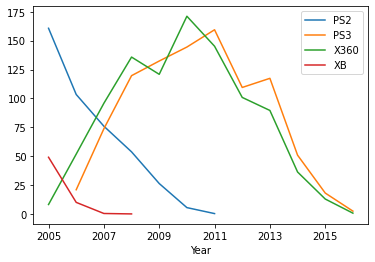

In [23]:
# Realizando o PIVOT e WHERE
%matplotlib inline

timeline_sales_pivot = timeline_sales.select("Year","Platform","Global_Sales_Total")\
                    .where("Platform in ('XB','PS2','PS3','X360')")\
                    .groupBy("Year")\
                    .pivot("Platform")\
                    .agg(f.sum("Global_Sales_Total"))\
                    .orderBy(f.asc("Year"))

# Deixar todo o processamento do lado do pyspark e colocar no pandas somento o df final!
# display_df(timeline_sales_pivot)
timeline_sales_pivot.toPandas().set_index("Year").plot()

### **AULA 2**

Spark **UDFs** (User Defined Functions) - Funções especificas definidas pelos usuarios e disponivel para uso em tempo de execução.



In [36]:
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import udf

#Função para ser usada nos dataframes - 
# 1) 10% de imposto sobre o TOTAL

def tax_collected(value):
  return (value*0.1)

#Conversão da função UDF para uso em Pyspark API
tax_collected_udf = udf(tax_collected, DoubleType())

#Conversão da função UDF para uso em Spark SQL
spark.udf.register("tax_collected_udf_sql", tax_collected, DoubleType())


<function __main__.tax_collected>

In [56]:
#[SQL]
%timeit 

udf_tax_sales = spark.sql("""
            SELECT Platform,
            NA_Sales,
            CAST(tax_collected_udf_sql(NA_Sales) as double) as TAX
            FROM videogame_sales
            LIMIT 10
""")

display_df(udf_tax_sales)

,Platform,NA_Sales,TAX
0,Wii,41.49,4.149
1,NES,29.08,2.908
2,Wii,15.85,1.585
3,Wii,15.75,1.575
4,GB,11.27,1.127
5,GB,23.20,2.320
6,DS,11.38,1.138
7,Wii,14.03,1.403
8,Wii,14.59,1.459
9,NES,26.93,2.693


time: 205 ms (started: 2022-06-07 20:37:40 +00:00)


In [ ]:
#[PYSPARK] A UDF fica dentro do SELECT

udf_tax_sales_py = df.select("Platform","NA_Sales",tax_collected_udf("NA_Sales").alias("TAX")).limit(10)

display_df(udf_tax_sales_py)

Spark **UDFs OBJETOS EXTERNOS**

> É possivel criar UDFs com objetos Python, de modo que possam ser utilizados de forma paralela pelo Cluster Spark.



In [58]:
# 2) 
import hashlib
from pyspark.sql.types import StringType

def generate_hash(value):
  hash_object = hashlib.md5(bytes(value,'utf8'))
  return hash_object.hexdigest()

#SPARK SQL
spark.udf.register("generate_hash_sql",generate_hash,StringType())

<function __main__.generate_hash>

time: 26.6 ms (started: 2022-06-07 20:38:05 +00:00)


In [ ]:
udf_hash = spark.sql("""
        SELECT Platform,
        generate_hash_sql(Platform) AS Platform_Hash
        FROM videogame_sales
        LIMIT 10 
        """)

display_df(udf_hash)

### **AULA 3**

Spark **JOINS**